In [20]:
import numpy as np
import pandas as pd
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LSTM, Dense

In [21]:
seed_value = 42

# Set TensorFlow random seed
tensorflow.random.set_seed(seed_value)


In [22]:
climVar1 = pd.read_csv(r"C:\Users\rajim\Downloads\d set\met_var_UK.csv")

In [23]:
climVar1

,month_year,maxTemp,minTemp,meanTemp,vapPress,cldCover,precipitation
0,01/1901,5.9,1.0,3.4,7.1,86.0,79.8
1,02/1901,4.6,-0.9,1.8,6.5,81.2,59.8
2,03/1901,6.4,0.5,3.5,7.0,81.4,80.6
3,04/1901,11.4,3.0,7.2,8.4,67.8,82.8
4,05/1901,15.5,5.4,10.4,9.7,57.4,42.1
...,...,...,...,...,...,...,...
1459,08/2022,20.7,11.9,16.3,14.2,65.3,47.7
1460,09/2022,17.1,9.8,13.4,12.9,80.0,128.5
1461,10/2022,14.6,8.8,11.7,12.0,77.2,164.3
1462,11/2022,10.9,6.1,8.5,10.1,84.8,181.1


In [24]:
climVar1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month_year     1464 non-null   object 
 1   maxTemp        1464 non-null   float64
 2   minTemp        1464 non-null   float64
 3   meanTemp       1464 non-null   float64
 4   vapPress       1464 non-null   float64
 5   cldCover       1464 non-null   float64
 6   precipitation  1464 non-null   float64
dtypes: float64(6), object(1)
memory usage: 80.2+ KB


In [36]:
climVar1[climVar1['maxTemp']>20]

,month_year,maxTemp,minTemp,meanTemp,vapPress,cldCover,precipitation
6,1901-07-01,20.5,11.5,16.0,14.1,70.1,67.9
126,1911-07-01,20.5,10.9,15.7,13.9,66.8,54.0
127,1911-08-01,20.3,11.5,15.9,14.6,67.8,68.9
246,1921-07-01,20.6,11.0,15.8,13.7,66.5,65.8
402,1934-07-01,20.5,11.8,16.1,15.0,70.9,71.7
559,1947-08-01,21.6,12.2,16.9,15.3,64.5,12.8
654,1955-07-01,20.8,10.8,15.8,14.0,65.8,31.5
655,1955-08-01,20.7,11.7,16.2,14.8,67.3,34.7
895,1975-08-01,21.0,12.0,16.5,15.6,68.5,67.3
906,1976-07-01,21.0,11.6,16.3,14.3,67.9,48.1


In [25]:
climVar1['month_year'] = pd.to_datetime(climVar1['month_year'])

In [26]:
climVar1.shape

(1464, 7)

In [27]:
climVar1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   month_year     1464 non-null   datetime64[ns]
 1   maxTemp        1464 non-null   float64       
 2   minTemp        1464 non-null   float64       
 3   meanTemp       1464 non-null   float64       
 4   vapPress       1464 non-null   float64       
 5   cldCover       1464 non-null   float64       
 6   precipitation  1464 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.2 KB


In [28]:
climVar1.isnull().sum()

month_year       0
maxTemp          0
minTemp          0
meanTemp         0
vapPress         0
cldCover         0
precipitation    0
dtype: int64

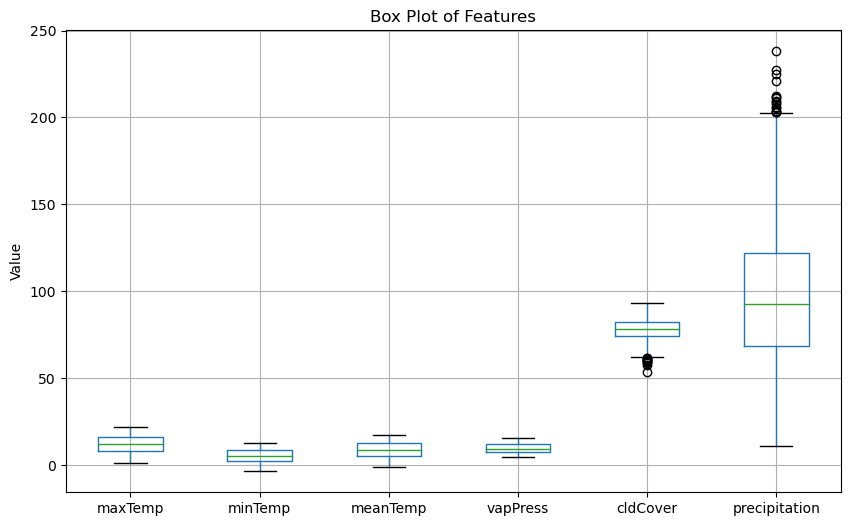

In [29]:
#Create a box plot for each variable
plt.figure(figsize=(10, 6))
climVar1.boxplot()
plt.title('Box Plot of Features')
plt.ylabel('Value')
plt.show()

In [30]:
climVar1.duplicated

<bound method DataFrame.duplicated of      month_year  maxTemp  minTemp  meanTemp  vapPress  cldCover  precipitation
0    1901-01-01      5.9      1.0       3.4       7.1      86.0           79.8
1    1901-02-01      4.6     -0.9       1.8       6.5      81.2           59.8
2    1901-03-01      6.4      0.5       3.5       7.0      81.4           80.6
3    1901-04-01     11.4      3.0       7.2       8.4      67.8           82.8
4    1901-05-01     15.5      5.4      10.4       9.7      57.4           42.1
...         ...      ...      ...       ...       ...       ...            ...
1459 2022-08-01     20.7     11.9      16.3      14.2      65.3           47.7
1460 2022-09-01     17.1      9.8      13.4      12.9      80.0          128.5
1461 2022-10-01     14.6      8.8      11.7      12.0      77.2          164.3
1462 2022-11-01     10.9      6.1       8.5      10.1      84.8          181.1
1463 2022-12-01      6.1      1.2       3.7       7.3      85.3          143.6

[1464 rows x 

In [31]:
dataTypes = climVar1.dtypes
print(dataTypes)

month_year       datetime64[ns]
maxTemp                 float64
minTemp                 float64
meanTemp                float64
vapPress                float64
cldCover                float64
precipitation           float64
dtype: object


In [32]:
climVar1.describe()

,maxTemp,minTemp,meanTemp,vapPress,cldCover,precipitation
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,12.057377,5.390369,8.699112,9.919604,78.112637,97.796995
std,4.623501,3.686655,4.126692,2.546742,6.041825,39.658748
min,1.400000,-3.600000,-1.100000,4.900000,53.600000,11.100000
25%,8.000000,2.300000,5.200000,7.700000,74.300000,68.575000
50%,11.900000,5.000000,8.400000,9.300000,78.300000,92.950000
75%,16.400000,8.900000,12.600000,12.200000,82.500000,122.200000
max,22.000000,12.900000,17.000000,15.700000,93.000000,238.100000


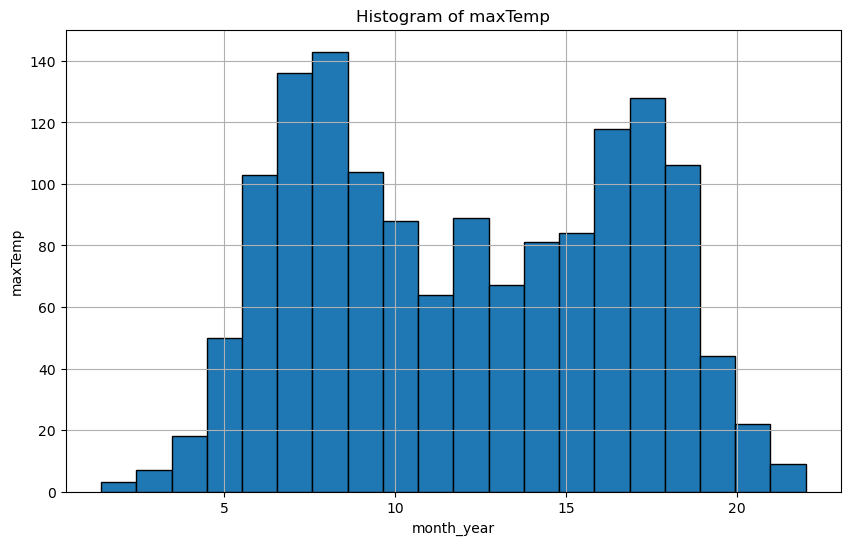

In [33]:
column_to_plot = 'maxTemp'  

# Plot a histogram
plt.figure(figsize=(10, 6))  
plt.hist(climVar1[column_to_plot], bins=20, edgecolor='black')  
plt.xlabel('month_year')
plt.ylabel(column_to_plot)
plt.title(f'Histogram of {column_to_plot}')
plt.grid(True)
plt.show()

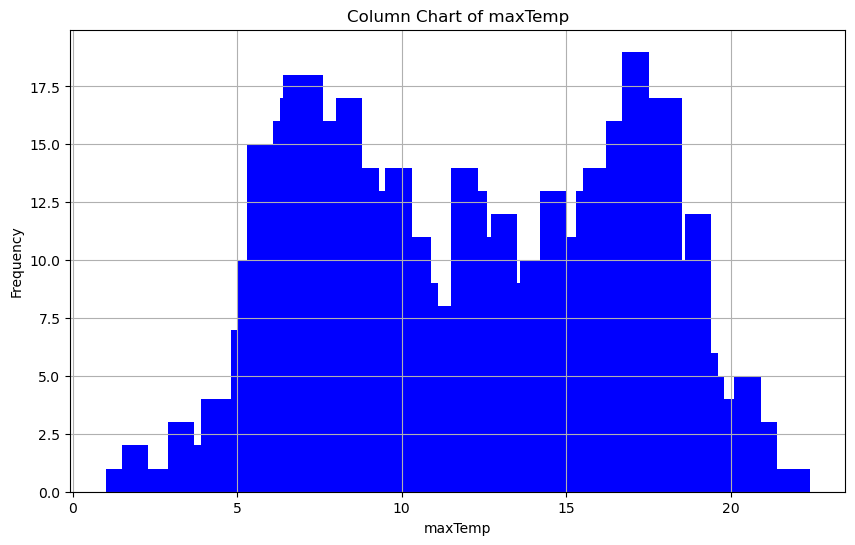

In [78]:
column_to_plot = 'maxTemp'  # Replace with the column name you want to plot

# Count the occurrences of each unique value in the column
value_counts = climVar1[column_to_plot].value_counts()

# Plot a column chart
plt.figure(figsize=(10, 6))  
plt.bar(value_counts.index, value_counts.values, color='blue')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.title(f'Column Chart of {column_to_plot}')
plt.grid(True)
plt.show()

In [79]:
climVar1.corr()

,maxTemp,minTemp,meanTemp,vapPress,cldCover,precipitation
maxTemp,1.000000,0.975286,0.995108,0.964789,-0.659544,-0.234138
minTemp,0.975286,1.000000,0.992259,0.989920,-0.495477,-0.107202
meanTemp,0.995108,0.992259,1.000000,0.981961,-0.590524,-0.178921
vapPress,0.964789,0.989920,0.981961,1.000000,-0.482615,-0.111899
cldCover,-0.659544,-0.495477,-0.590524,-0.482615,1.000000,0.540236
precipitation,-0.234138,-0.107202,-0.178921,-0.111899,0.540236,1.000000


In [80]:
# Define features and target
features = climVar1[['minTemp', 'meanTemp', 'cldCover', 'vapPress', 'precipitation']]
target = climVar1['maxTemp']

In [81]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [82]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
# Build the ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer

In [84]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [86]:
# Loading the data into DataFrame

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss_10,10,0.001,all: {loss}")

Epoch 1/50
37/37 [==============================] - 0s 5ms/step - loss: 0.1796 - val_loss: 0.1244
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1709 - val_loss: 0.1157
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1642 - val_loss: 0.1152
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1585 - val_loss: 0.1078
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1522 - val_loss: 0.1068
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1477 - val_loss: 0.1017
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1436 - val_loss: 0.0995
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 0.1388 - val_loss: 0.0958
Epoch 9/50
37/37 [==============================] - 0s 5ms/step - loss: 0.1349 - val_loss: 0.0934
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 0.1310 - val_loss: 0.0900
Epoch 11/50
37/37 [

In [27]:
# Build the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 20,20,0.001,all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 141.3283 - val_loss: 134.4599
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 105.1212 - val_loss: 84.3687
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 52.3461 - val_loss: 29.2770
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 17.6935 - val_loss: 12.3445
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 11.5576 - val_loss: 10.3655
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 9.9286 - val_loss: 9.0034
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 8.7499 - val_loss: 7.8735
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 7.7583 - val_loss: 6.9345
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 6.8924 - val_loss: 6.0787
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 6.0585 - val_loss: 5.3055
Epoch 

In [28]:
# Build the ANN model
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 30,30,0.001,all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 155.2609 - val_loss: 148.9319
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 119.7764 - val_loss: 101.9046
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 67.7479 - val_loss: 41.2186
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 21.7781 - val_loss: 10.4342
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 9.6521 - val_loss: 8.4931
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 8.4314 - val_loss: 7.4077
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 7.4487 - val_loss: 6.4991
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 6.5227 - val_loss: 5.6199
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 5.6451 - val_loss: 4.7917
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 4.8044 - val_loss: 3.9996
Epoch 1

In [63]:
# Build the ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss10,0.001,all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 6ms/step - loss: 163.7744 - val_loss: 169.9908
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 155.8996 - val_loss: 161.7571
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 148.2272 - val_loss: 153.6687
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 140.7590 - val_loss: 145.8232
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 133.5523 - val_loss: 138.4184
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 126.4418 - val_loss: 130.6305
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 118.9867 - val_loss: 122.3986
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 110.6538 - val_loss: 112.6955
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 101.1582 - val_loss: 102.0353
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 91.1905 -

In [32]:
# Build the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 20, 0.001, all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 6ms/step - loss: 168.0866 - val_loss: 168.8928
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 152.8688 - val_loss: 152.7590
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 137.3840 - val_loss: 135.8702
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 121.3293 - val_loss: 118.3050
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 104.9989 - val_loss: 101.1638
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 89.0233 - val_loss: 84.2927
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 73.7912 - val_loss: 68.4667
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 59.8984 - val_loss: 54.6728
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 47.8456 - val_loss: 42.9911
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 37.8753 - val_los

In [33]:
# Build the ANN model
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 30, 0.001, all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 6ms/step - loss: 155.5034 - val_loss: 156.9739
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 139.3311 - val_loss: 138.7308
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 121.0452 - val_loss: 118.2375
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 101.2953 - val_loss: 96.0693
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 80.6719 - val_loss: 74.4447
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 60.9962 - val_loss: 54.2913
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 43.9162 - val_loss: 37.3328
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 30.2873 - val_loss: 25.4624
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 21.2048 - val_loss: 18.0647
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 15.9855 - val_loss: 

In [36]:
# Build the ANN model
model = Sequential()
model.add(Dense(40, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 40, 0.001, all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 6ms/step - loss: 140.7440 - val_loss: 139.0216
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 121.8869 - val_loss: 117.7570
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 101.0410 - val_loss: 94.1893
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 78.6131 - val_loss: 70.0881
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 57.1457 - val_loss: 48.6864
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 39.4242 - val_loss: 32.4836
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 26.9924 - val_loss: 22.2191
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 19.6854 - val_loss: 16.9920
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 16.0270 - val_loss: 14.4478
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 14.0553 - val_loss: 13

In [38]:
# Build the ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 10,0.002,all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 14ms/step - loss: 137.5665 - val_loss: 129.5733
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 112.7526 - val_loss: 101.4472
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 87.2357 - val_loss: 75.1308
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 65.4996 - val_loss: 54.7216
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 50.2269 - val_loss: 42.8205
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 42.0580 - val_loss: 37.2705
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 38.1427 - val_loss: 34.8719
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 35.9858 - val_loss: 33.0896
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 33.9011 - val_loss: 31.1908
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 31.6694 - val_loss: 29

In [39]:
# Build the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 20, 0.002, all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 6ms/step - loss: 155.5973 - val_loss: 153.7454
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 132.0057 - val_loss: 126.3555
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 103.4946 - val_loss: 92.9905
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 71.6987 - val_loss: 59.1949
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 43.5392 - val_loss: 32.9883
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 24.7480 - val_loss: 18.6105
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 15.7195 - val_loss: 13.1586
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 12.2805 - val_loss: 11.2167
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 10.6446 - val_loss: 9.9086
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 9.3971 - val_loss: 8.76

In [40]:
# Build the ANN model
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 30, 0.002, all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 6ms/step - loss: 172.0036 - val_loss: 165.1904
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 142.0769 - val_loss: 136.8532
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 115.2293 - val_loss: 107.6800
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 86.9943 - val_loss: 76.3117
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 57.9971 - val_loss: 45.5315
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 32.8859 - val_loss: 23.5141
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 17.7506 - val_loss: 13.4484
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 11.7091 - val_loss: 9.9802
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 9.2861 - val_loss: 8.1766
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 7.6360 - val_loss: 6.771

In [42]:
# Build the ANN model
model = Sequential()
model.add(Dense(40, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 40, 0.002, all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 142.7347 - val_loss: 129.6484
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 103.8470 - val_loss: 85.5395
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 62.7340 - val_loss: 44.5909
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 32.1048 - val_loss: 22.3847
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 18.4725 - val_loss: 15.4780
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 14.3038 - val_loss: 12.7392
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 11.9993 - val_loss: 10.5647
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 9.8604 - val_loss: 8.6232
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 8.1064 - val_loss: 6.9772
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 6.5771 - val_loss: 5.5656
Ep

In [45]:
# Build the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 20,10,0.001,all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 8ms/step - loss: 170.0959 - val_loss: 172.1256
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 154.1498 - val_loss: 154.0759
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 133.5602 - val_loss: 128.0393
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 104.4140 - val_loss: 92.8665
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 69.3420 - val_loss: 54.5402
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 37.5289 - val_loss: 26.2375
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 19.0272 - val_loss: 13.8787
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 12.3700 - val_loss: 10.3337
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 9.8644 - val_loss: 8.7004
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 8.4811 - val_loss: 7.6

In [62]:
# Build the ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 10,10,0.002,all: {loss}")

Epoch 1/50
37/37 [==============================] - 2s 10ms/step - loss: 150.8138 - val_loss: 142.1324
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 111.1234 - val_loss: 88.2805
Epoch 3/50
37/37 [==============================] - 0s 5ms/step - loss: 52.6250 - val_loss: 23.9572
Epoch 4/50
37/37 [==============================] - 0s 5ms/step - loss: 14.0994 - val_loss: 10.5696
Epoch 5/50
37/37 [==============================] - 0s 5ms/step - loss: 9.7451 - val_loss: 8.5685
Epoch 6/50
37/37 [==============================] - 0s 5ms/step - loss: 8.0065 - val_loss: 7.0694
Epoch 7/50
37/37 [==============================] - 0s 5ms/step - loss: 6.6760 - val_loss: 5.8172
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 5.5978 - val_loss: 4.7828
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 4.6694 - val_loss: 3.9540
Epoch 10/50
37/37 [==============================] - 0s 5ms/step - loss: 3.8620 - val_loss: 3.1690
Epoch 1

In [46]:
# Build the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 20,10,0.002,all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 142.5956 - val_loss: 132.5299
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 103.6989 - val_loss: 78.0180
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 49.4192 - val_loss: 28.2082
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 19.4747 - val_loss: 13.4773
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 12.5385 - val_loss: 10.0982
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 9.2263 - val_loss: 7.4127
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 6.8875 - val_loss: 5.5025
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 5.1789 - val_loss: 4.1241
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 3.9202 - val_loss: 3.0599
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 2.9269 - val_loss: 2.1847
Epoch 

In [47]:
# Build the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 20,20,0.002,all: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 141.0613 - val_loss: 112.4421
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 63.2927 - val_loss: 24.7765
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 16.4363 - val_loss: 13.0529
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 11.4052 - val_loss: 9.5542
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 8.5057 - val_loss: 7.1531
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 6.5741 - val_loss: 5.4840
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 5.0689 - val_loss: 4.0488
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 3.7181 - val_loss: 2.9060
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 2.5951 - val_loss: 1.8929
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 1.7627 - val_loss: 1.2494
Epoch 11/5

In [48]:
# Define features and target
features_1 = climVar1[['minTemp', 'meanTemp', 'vapPress', ]]
target = climVar1['maxTemp']

In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_1, target, test_size=0.2, random_state=42)

In [50]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Build the ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 10,0.001,temp_vp: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 159.6774 - val_loss: 164.5372
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 151.4725 - val_loss: 155.7306
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 143.1606 - val_loss: 146.2844
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 134.1560 - val_loss: 136.2456
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 124.5048 - val_loss: 125.4225
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 114.1714 - val_loss: 114.1429
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 103.3991 - val_loss: 102.2816
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 92.2918 - val_loss: 90.2347
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 81.1492 - val_loss: 78.5451
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 70.4197 - val

In [59]:
# Build the ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 10,0.002,temp_vp: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 6ms/step - loss: 152.8117 - val_loss: 150.9559
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 136.3363 - val_loss: 134.3970
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 121.8565 - val_loss: 118.9006
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 107.5719 - val_loss: 103.1476
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 93.1966 - val_loss: 87.9492
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 79.6528 - val_loss: 73.5069
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: 67.3848 - val_loss: 61.7781
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 57.5503 - val_loss: 52.5887
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 50.2246 - val_loss: 46.2619
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 45.1499 - val_loss:

In [60]:
# Build the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 20,20,0.002,temp_vp: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 142.0221 - val_loss: 125.2203
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 92.0487 - val_loss: 64.4883
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 33.8073 - val_loss: 15.0220
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 12.7331 - val_loss: 10.2144
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 7.8504 - val_loss: 5.5657
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 3.8315 - val_loss: 2.2658
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 1.3944 - val_loss: 0.8009
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 0.5353 - val_loss: 0.3771
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 0.3391 - val_loss: 0.3096
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 0.3091 - val_loss: 0.2887
Epoch 11/

In [25]:
# Define features and target
features_2 = climVar1[['minTemp', 'meanTemp', 'cldCover', 'precipitation']]
target = climVar1['maxTemp']

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_1, target, test_size=0.2, random_state=42)

In [27]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Build the ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 10,0.001,temp_clcv_prec: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 9ms/step - loss: 161.4810 - val_loss: 168.2348
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 155.5155 - val_loss: 162.5173
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 150.1945 - val_loss: 157.4041
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 145.1380 - val_loss: 152.1943
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 140.0055 - val_loss: 146.9262
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 134.8619 - val_loss: 141.5904
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 129.7112 - val_loss: 136.1275
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 124.2948 - val_loss: 130.0409
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 117.9985 - val_loss: 122.7745
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 110.8115 

In [61]:
# Build the ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 10,0.002,temp_clcv_prec: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 6ms/step - loss: 161.7912 - val_loss: 162.6850
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 146.1193 - val_loss: 148.7566
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 133.2680 - val_loss: 136.3785
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 122.0145 - val_loss: 125.1669
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 111.9018 - val_loss: 114.6060
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 101.9644 - val_loss: 103.7879
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 91.6034 - val_loss: 92.2204
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 80.2797 - val_loss: 79.0614
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 64.2836 - val_loss: 57.3786
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 44.1049 - val_l

In [64]:
# Build the ANN model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss 20,20,0.002,temp_clcv_prec: {loss}")

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 161.6599 - val_loss: 156.3076
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 129.7421 - val_loss: 109.9912
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 70.1592 - val_loss: 34.7842
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 22.0873 - val_loss: 16.9558
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 15.0679 - val_loss: 12.9077
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: 10.9015 - val_loss: 8.7656
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 7.0672 - val_loss: 5.6788
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: 4.4904 - val_loss: 3.3884
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: 2.5558 - val_loss: 1.9362
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: 1.3695 - val_loss: 0.9559
Epoc